# App

## Package

In [180]:
from typing import Tuple, Union

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pickle

from utils import get_data, get_metrics
from classic_CV import create_result_classic
from NN_model import get_NN_model

## Import data

In [32]:
data = get_data(path='../data/HRF/')

In [34]:
MLdata = pd.read_csv('../data/for_CML/test_data.csv')

In [109]:
features_classic_ml = ['ch_avg_B', 'ch_avg_G', 'ch_avg_R', 'ch_std_B',
       'ch_std_G', 'ch_std_R', 'hu_mom1', 'hu_mom2', 'hu_mom3', 'hu_mom4',
       'hu_mom5', 'hu_mom6', 'hu_mom7', 'sp_mom_00', 'sp_mom_10', 'sp_mom_01',
       'sp_mom_20', 'sp_mom_11', 'sp_mom_02', 'sp_mom_30', 'sp_mom_21',
       'sp_mom_12', 'sp_mom_03', 'nu_mom_20', 'nu_mom_11', 'nu_mom_02',
       'nu_mom_30', 'nu_mom_21', 'nu_mom_12', 'nu_mom_03']

## Import models

In [181]:
classic_model = pickle.load(open('../trained/RFC_model','rb'))
NN_model = get_NN_model()
NN_model.load_weights('./output/NN_model')

NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ./output/NN_model

# Main

In [170]:
def final_function(model: str='classic_CV', index: int=0) -> Union[Tuple[None, None], Tuple[np.ndarray, Tuple[float, float, float]]]:
    models = ['classic_CV', 'classic_ML', 'UNet']
    dim = (876, 584)
    if model in models:
        if model == 'classic_CV':
            result = create_result_classic(data['original'][index][:, :, 1], data['mask'][index])
            metrics = get_metrics(result, data['labeled'][index])
        else:
            if index not in [0, 1, 2, 3, 4]:
                print('Wrong index. Choose between 0 and 4!')
                return None, None
            image = MLdata.loc[MLdata.id == index]
            if model == 'classic_ML':
                result = classic_model.predict_proba(image.drop(['Unnamed: 0', 'id', 'label'], axis=1))[:,1] > 0.6
            else:

            result = np.where(result, 255, 0)
            result = np.pad(result.reshape(dim[1]-4, dim[0]-4), 2)
            label = cv2.resize(data['labeled'][index], dim, interpolation=cv2.INTER_AREA)
            label = np.where(label > 190, 255, 0)
            metrics = get_metrics(result, label)
    else:
        print('Wrong model')
        return None, None
    return result, metrics

### Classic test

metric = (0.9150950772502658, 0.9817846341666435, 0.9138994525679067)
metric = (0.9135054067367235, 0.9966576350295671, 0.9124652501948859)
metric = (0.9077386362747858, 0.9680628092358439, 0.9068682977466151)
metric = (0.9308565406658535, 0.9792666896622447, 0.9295535836383002)
metric = (0.9355539608353662, 0.9783286920690982, 0.934367874237915)
accuracy:0.23336140195940452, sensitivity0.24448973177317682, specificity0.2330630568002215


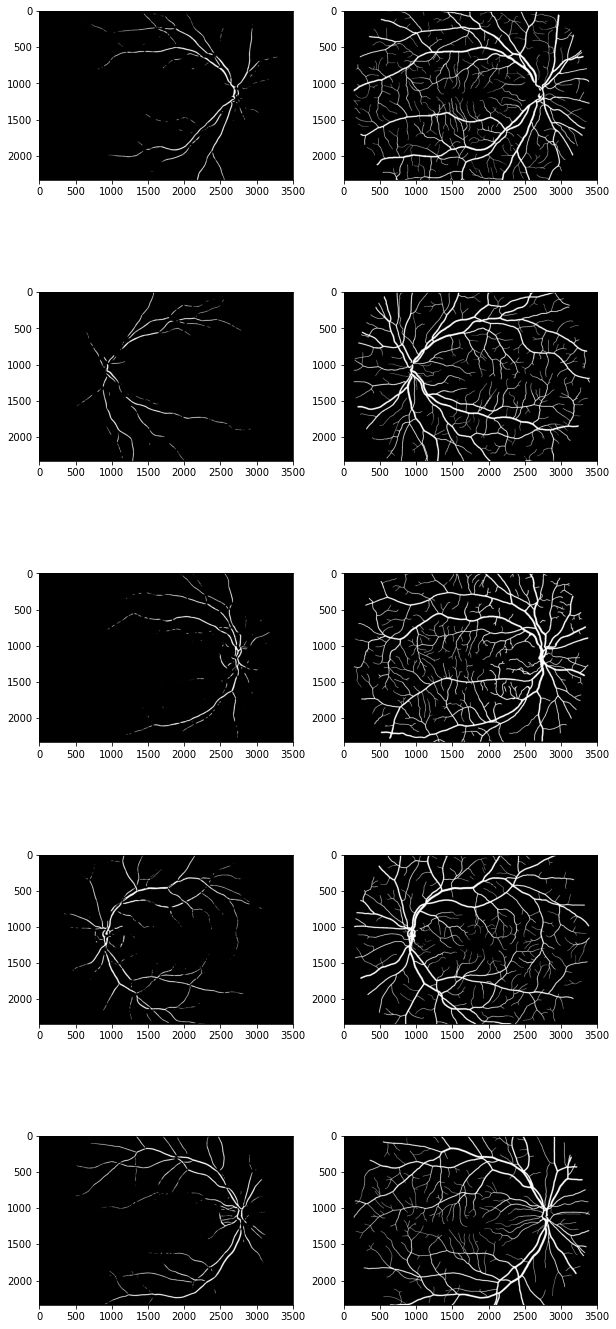

In [183]:
metrics_summary = np.array([0.0, 0.0, 0.0])
num = 5
plt.figure(figsize=(5*2, 5*num))

for index in range(num):
    result, metric = final_function(index=index)
    print(f'{metric = }')
    metrics_summary += metric
    plt.subplot(num, 2, index*2+1)
    plt.imshow(result, cmap='gray')
    plt.subplot(num, 2, index*2+2)
    plt.imshow(data['labeled'][index], cmap='gray')
metrics_summary = metrics_summary/5
print(f'accuracy:{metrics_summary[0]}, sensitivity:{metrics_summary[1]}, specificity:{metrics_summary[2]}')

## ML test

In [171]:
result, metric = final_function(model='classic_ML', index=0)

(584, 876) (584, 876)


C:\Users\Adam\PP\IwM\Segmenting-Retinal-Blood-Vessels\utils.py:12: RuntimeWarning: invalid value encountered in double_scalars
  sensitivity = 1.0 * TP / (TP + FN)


In [173]:
metric

(0.9122431506849316, nan, 0.9122431506849316)

In [26]:
metrics_summary = np.array([0.0, 0.0, 0.0])
num = 5
plt.figure(figsize=(5*2, 5*num))

for index in range(num):
    result, metric = final_function(index=index)
    print(f'{metric = }')
    metrics_summary += metric
    plt.subplot(num, 2, index*2+1)
    plt.imshow(result, cmap='gray')
    plt.subplot(num, 2, index*2+2)
    plt.imshow(data['labeled'][index], cmap='gray')
    metrics_summary = metrics_summary/5
print(f'accuracy:{metrics_summary[0]}, sensitivity{metrics_summary[1]}, specificity{metrics_summary[2]}')

1 2
3 4
5 6
7 8
9 10
